In [2]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

mapping={0 : "id",
         1 : "Daerah",
         2 : "Sumbu Utama",
         3 : "Sumbu Kecil",
         4 : "Keunikan",
         5 : "Area Bulatan",
         6 : "Diameter",
         7 : "Kadar Air",
         8 : "Keliling",
         9 : "Bulatan",
         10 : "Ransum",
         11 : "Kelas"}
file="Gandum.csv"
df=pd.read_csv(file, header = None)
n=df.shape[1]

def DrawBoxplot(title,newdata):
    sns.boxplot(data=newdata)
    plt.title(title)
    plt.ylabel("Besar")

def DrawBoxplotFromDF(dataframe):
    sns.boxplot(data = dataframe)
    plt.title(mapping[dataframe.name])
    plt.ylabel("Besar")

def DrawBoxplotFrom2DF(dataframe1, dataframe2):
    '''fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1 = sns.boxplot(data=dataframe1)
    ax2 = sns.boxplot(data=dataframe2)'''
    #ax1 = dataframe1.boxplot(return_type='axes')
    #ax2 = dataframe2.boxplot(ax = ax1)
    sns.boxplot(data=dataframe1)
    sns.boxplot(data=dataframe2)
    plt.title("{} dan {}".format(mapping[dataframe1.name], mapping[dataframe2.name]))
    plt.ylabel("Besar")
    plt.show()
    '''
    boxplot1 = sns.boxplot(data=dataframe1)
    sns.boxplot(data = dataframe2, ax=boxplot1)
    '''

def DescribeData(i):
    data=df[i]
    index=pd.DataFrame(data)
    print("Rata-rata " + mapping[i] + " : " + str(data.mean()))
    print("Nilai Tengah " + mapping[i] + " : " + str(data.median()))
    if(data[data==index.value_counts().idxmax()].shape[0]!=1):
        print("Modus "+ mapping[i] + " : (Kolom kiri : indeks modus dimulai dari 0, Kolom kanan : modus)" )
        print(data.mode())
        print("Jumlah kemunculan modus : "+str(data[data==index.value_counts().idxmax()].shape[0]))
    else:
        print("Data tidak memiliki modus karena semua elemen bersifat unik")
    print("Standar Deviasi " + mapping[i] + " : " + str(data.std()))
    print("Variansi " + mapping[i] + " : " + str(data.var()))
    print("Range " + mapping[i] + " : " + str(data.max()-data.min()))
    print("Nilai Minimum " + mapping[i] + " : " + str(data.min()))
    print("Nilai Maksimum " + mapping[i] + " : " + str(data.max()))
    print("Quartil " + mapping[i] + " : ")
    print("\tQ1 : ",np.quantile(data, .25))
    print("\tQ2 : ",np.quantile(data, .50))
    print("\tQ3 : ",np.quantile(data, .75))
    print("IQR " + mapping[i] + " : "+ str(np.quantile(data, .75)-np.quantile(data, .25)))
    print("Skewness " + mapping[i] + " : "+ str(data.skew()))
    print("Kurtosis " + mapping[i] + " : "+ str(data.kurtosis()))
    print()
    
def DrawHistogram(i):
    df.hist(i,edgecolor='k')
    plt.title(mapping[i])
    plt.xlabel("Besar")
    plt.ylabel("jumlah")

    
def DrawScatter(i):
    df.plot.scatter(x=i,y=11,c=i,colormap="viridis")
    plt.xlabel(mapping[i])
    plt.ylabel("Kelas")

def Correlation(i):
    a=df[i]
    b=df[11]
    corr=np.corrcoef([a,b])[0,1]
    print(mapping[i]," dan ",mapping[11], "memiliki hubungan korelasi sebesar ",corr)
    if (corr>0):
        print("Korelasi berbanding lurus")
    elif (corr==0):
        print("Tidak memiliki korelasi")
    else:
        print("Korelasi berbanding terbalik")
    if(abs(corr)<0.25):
        print("Korelasi sangat lemah atau tidak berkorelasi")
    elif (0.25<=abs(corr)<0.5):
        print("Korelasi sedang")
    elif (0.5<=abs(corr)<0.75):
        print("Korelasi cukup kuat")
    else:
        print("Korelasi sangat kuat")
    DrawScatter(i)
    
def CheckNormality(i):
    data=df[i]
    stat, p=stats.shapiro(data)
    print("stat : ",round(stat,4),", p : ",p)
    if(p>0.05):
        print("Kemungkinan data berdistribusi normal")
    else:
        print("Kemungkinan data tidak berdistribusi normal")

def FValue(alpha, v1, v2):
    # mengembalikan nilai variabel f_alpha(v1, v2) pada distribusi F berderajat v1, v2, dengan distribusi peluang f > f_alpha sebesar alpha
    return stats.f.isf(q=alpha, dfn=v1, dfd=v2)

Jawaban pertanyaan No.4 bagian a
"Nilai rata-rata Daerah di atas 4700?"

1.	H0 : μ = μ0 = 4700
2.	H1 : μ > μ0 = 4700
3.	α = 0.05
  	Daerah kritis z > z_(0.05) = 1.645 karena P(Z < 1.645) = 0.95
4.	Tes statistik:
	x̄ = 4665.125, σ = 4665.125, n = 120
5.	Komputasi:
  	z = (x̄ - μ0)/(σ/n**0.5) =  -0.16716137448686835
6.	Kesimpulan:
	Tidak menolak H0 karena nilai uji z < 1.645
	Jadi, hipotesis Nilai rata-rata di suatu daerah diatas 4700 tidak bisa dikatakan benar



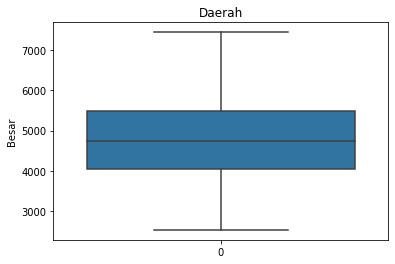

In [3]:
#4.a Nilai rata-rata disuatu daerah diatas 4700
def Answer4a():
    print("Jawaban pertanyaan No.4 bagian a")
    print("\"Nilai rata-rata Daerah di atas 4700?\"")
    print()

    # Variables
    μ0 = 4700
    n = 120
    sampel = df[1].sample(n)
    xbar = sampel.mean()
    sigma = sampel.mean()

    print("1.\tH0 : μ = μ0 = 4700")
    print("2.\tH1 : μ > μ0 = 4700")
    print("3.\tα = 0.05")
    print("  \tDaerah kritis z > z_(0.05) = 1.645 karena P(Z < 1.645) = 0.95")

    print("4.\tTes statistik:")
    print("\tx̄ = {}, σ = {}, n = {}".format(round(xbar, 3), round(sigma, 3), n))

    print("5.\tKomputasi:")
    z = (xbar - μ0) / (sigma/500**0.5)
    print("  \tz = (x̄ - μ0)/(σ/n**0.5) = ", z)
    print("6.\tKesimpulan:")
    if (z > 1.645):
        print("\tTolak H0 karena nilai uji = z > 1.645")
        print("\tJadi, hipotesis Nilai rata-rata di suatu daerah diatas 4700 bisa dikatakan benar")
    else:
        print("\tTidak menolak H0 karena nilai uji z < 1.645")
        print("\tJadi, hipotesis Nilai rata-rata di suatu daerah diatas 4700 tidak bisa dikatakan benar")
    print()

    DrawBoxplot("Daerah",df[1])
Answer4a()

Jawaban pertanyaan No.4 bagian b
"Nilai Rata-rata Sumbu Utama tidak sama dengan 116"
(Diambil sampel 100 data pertama)

Langkah testing:
1.	H0 : μ = 116
2.	H1 : μ ≠ 116
3.	α = 0.05
4.	Menggunakan tes statistik normal two-tailed, standar deviasi populasi (sigma) diketahui
  	Daerah kritis pada z < -z_(0.05/2) = -1.96 atau z > z_(0.05/2) = 1.96
5.	Komputasi:
  	sigma = 17.166179264448175
  	n = 100
  	μ0 = 116
6.	Keputusan:
Tidak menolak H0 karena nilai uji z = 0.691 tidak terletak pada daerah kritis
Jadi, hipotesis null nilai rata-rata Sumbu Utama sama dengan 116 diterima


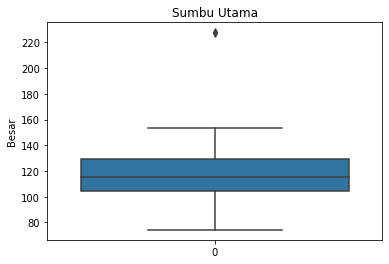

In [5]:
def Answer4b():
    print("Jawaban pertanyaan No.4 bagian b")
    print("\"Nilai Rata-rata Sumbu Utama tidak sama dengan 116\"")
    print("(Diambil sampel 100 data pertama)")
    print()

    # Variables
    n = 100
    data = df[2].head(n)    # SumbuUtama
    μ0 = 116
    α = 0.05
    sigma = data.std()

    print("Langkah testing:")
    print("1.\tH0 : μ = {}".format(μ0))
    print("2.\tH1 : μ ≠ {}".format(μ0))
    print("3.\tα = {}".format(α))
    min_za, za = stats.norm.interval(1 - α, loc=0, scale=1)
    print("4.\tMenggunakan tes statistik normal two-tailed, standar deviasi populasi (sigma) diketahui")
    print("  \tDaerah kritis pada z < -z_({}/2) = {} atau z > z_({}/2) = {}".format(α, round(min_za, 3), α, round(za, 3)))

    print("5.\tKomputasi:")
    print("  \tsigma = {}".format(sigma))
    print("  \tn = {}".format(n))
    print("  \tμ0 = {}".format(μ0))
    z = (data.mean() - μ0)/(data.std() / n**0.05)

    print("6.\tKeputusan:")
    if (z > za or z < min_za):
        print("Tolak H0 karena nilai uji z = {} berada pada daerah kritis".format(round(z, 3)))
        print("Jadi, hipotesis alternatif nilai rata-rata Sumbu Utama tidak sama dengan 116 diterima")
    else:
        print("Tidak menolak H0 karena nilai uji z = {} tidak terletak pada daerah kritis".format(round(z, 3)))
        print("Jadi, hipotesis null nilai rata-rata Sumbu Utama sama dengan 116 diterima")
    DrawBoxplot("Sumbu Utama",df[2])

Answer4b()

Jawaban pertanyaan No.4 bagian c
1.	H0 : μ = 50
2.	H1 : μ ≠ 50
3.	α = 0.05
4.	Daerah kritis z>(z(0.05/2))= 1.96 karena P(Z<1.96)=0.975 atau z < -1.96
5.	n =  10
	μ0 =  50
	x̅ =  55.111931393
	σ =  3.953368543349301
	z =  4.089005683922909
6.	Tolak H0 karena nilai uji =  4.089005683922909  berada di titik kritis
	Jadi, hipotesis 20 baris pertama kolom Sumbu Kecil bukan 50 bisa dikatakan benar



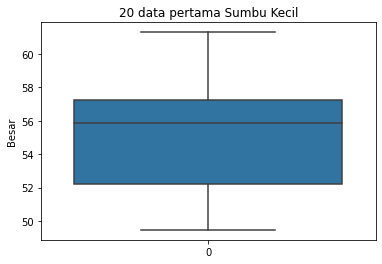

In [7]:
def Answer4c():
    print("Jawaban pertanyaan No.4 bagian c")
    newdata=df[3].head(20)
    sample=newdata.head(10)
    n=len(sample)
    μ0=50
    print("1.\tH0 : μ = 50")
    print("2.\tH1 : μ ≠ 50")
    print("3.\tα = 0.05")
    print("4.\tDaerah kritis z>(z(0.05/2))= 1.96 karena P(Z<1.96)=0.975 atau z < -1.96")
    z=(sample.mean()-μ0)/(sample.std()/n**0.5)
    print("5.\tn = ",n)
    print("\tμ0 = ",μ0)
    print("\tx̅ = ",sample.mean())
    print("\tσ = ",sample.std())
    print("\tz = ",z)
    if (z>1.96 or z<-1.96):
        print("6.\tTolak H0 karena nilai uji = ",z," berada di titik kritis")
        print("\tJadi, hipotesis 20 baris pertama kolom Sumbu Kecil bukan 50 bisa dikatakan benar")
    else:
        print("6.\tTidak menolak H0 karena nilai uji : -1.96 < z < 1.96")
        print("\tJadi, hipotesis 20 baris pertama kolom Sumbu Kecil bukan 50 tidak bisa dikatakan benar")
    print()
    DrawBoxplot("20 data pertama Sumbu Kecil",newdata)

Answer4c()

Jawaban pertanyaan No.4 bagian d
"Proporsi nilai diameter yang lebih dari 85, adalah tidak sama dengan 15%"
(Diambil sampel 100 data pertama)

Langkah testing:
1.	H0 : p = p0 = 0.15
2.	H1 : p ≠ 0.15
3.	α = 0.05
  	Menggunakan tes statistik binomial yang didekati normal karena n = 100 besar
  	Daerah kritis pada z < -z_(0.05/2) = -1.96 atau z > z_(0.05/2) = 1.96
4.	Test statistik
  	p0 = 0.15
  	q0 = 1 - p0 = 0.85
  	n = 100
5.	Komputasi
z = (x0 - n * p0)/((n * p0 * q0)**0.05) = 4.402
6.	Keputusan:
Tolak H0 karena nilai uji z = 4.402 berada pada daerah kritis
Jadi, hipotesis alternatif proporsi nilai diameter yang lebih dari 85, adalah tidak sama dengan 15%, diterima



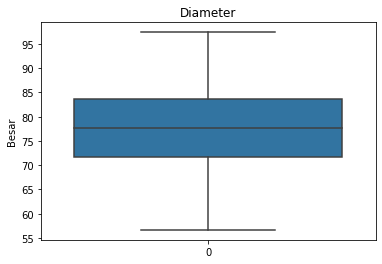

In [5]:
def Answer4d():
    print("Jawaban pertanyaan No.4 bagian d")
    print("\"Proporsi nilai diameter yang lebih dari 85, adalah tidak sama dengan 15%\"")
    print("(Diambil sampel 100 data pertama)")
    print()
    DrawBoxplot("Diameter",df[6])

    # Variables
    n = 100
    data = df[6].head(n)    # Diameter
    p0 = 0.15
    q0 = 1 - p0
    α = 0.05
    x0 = len([diameter for diameter in data if diameter > 85])  # banyak data diameter pada sampel yang > 85
    
    print("Langkah testing:")
    print("1.\tH0 : p = p0 = {}".format(p0))
    print("2.\tH1 : p ≠ {}".format(p0))
    
    print("3.\tα = {}".format(α))
    print("  \tMenggunakan tes statistik binomial yang didekati normal karena n = {} besar".format(n))
    min_za, za = stats.norm.interval(1 - α, loc=0, scale=1)
    print("  \tDaerah kritis pada z < -z_({}/2) = {} atau z > z_({}/2) = {}".format(α, round(min_za, 3), α, round(za, 3)))

    print("4.\tTest statistik")
    print("  \tp0 = {}".format(p0))
    print("  \tq0 = 1 - p0 = {}".format(q0))
    print("  \tn = {}".format(n))
    
    print("5.\tKomputasi")
    z = (x0 - n * p0)/((n * p0 * q0)**0.05)
    print("z = (x0 - n * p0)/((n * p0 * q0)**0.05) = {}".format(round(z, 3))) 

    print("6.\tKeputusan:")
    if (z > za or z < min_za):
        print("Tolak H0 karena nilai uji z = {} berada pada daerah kritis".format(round(z, 3)))
        print("Jadi, hipotesis alternatif proporsi nilai diameter yang lebih dari 85, adalah tidak sama dengan 15%, diterima")
    else:
        print("Tidak menolak H0 karena nilai uji z = {} tidak terletak pada daerah kritis".format(round(z, 3)))
        print("Jadi, hipotesis null proporsi nilai diameter yang lebih dari 85, adalah sama dengan 15%, diterima")
    print()

Answer4d()

In [102]:
def Answer4e():
    print("Jawaban pertanyaan No.4 bagian e")
    print("\"Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%?\"")

    newdata = df[8]
    p0 = 0.05
    q0 = 1-p0
    n = df[8].shape[0]
    x = pd.DataFrame(newdata[newdata<100]).count().sum()
    print("1.\tH0 : p = 0.05")
    print("2.\tH1 : p < 0.05")
    print("3.\tα = 0.05")
    print("  \tDaerah kritis z < -z_(0.05) = -1.645 karena P(Z < 1.645) = 0.95")

    print("4.\tTes statistik (binomial dengan pendekatan normal):")
    print("  \tp0 = {}, q0 = {}, n = {}, x = {}".format(p0, q0, n, x))

    print("5.\tKomputasi:")
    z = (x - n*p0)/((n * p0 * q0)**0.5)
    print("  \tz = (x - n*p0)/((n*p0*q0)**0/05) = ", z)

    print("6.\tKesimpulan:")
    if (z < -1.96):
        print("\tTolak H0 karena nilai uji = z < -1.645")
        print("\tJadi, hipotesis Proporsi nilai Keliling yang kurang dari 100 adalah kurang dari 5% bisa dikatakan benar")
    else:
        print("\tTidak menolak H0 karena nilai uji  z > -1.645")
        print("\tJadi, hipotesis Proporsi nilai Keliling yang kurang dari 100 adalah kurang dari 5% tidak bisa dikatakan benar")
    print()
    DrawBoxplot("Diameter",df[8])

Answer4e()

Jawaban pertanyaan No.4 bagian e
"Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%?"
1.	H0 : p = 0.05
2.	H1 : p < 0.05
3.	α = 0.05
  	Daerah kritis z < -z_(0.05) = -1.645 karena P(Z < 1.645) = 0.95
4.	Tes statistik (binomial dengan pendekatan normal):
  	p0 = 0.05, q0 = 0.95, n = 500, x = 0
5.	Komputasi:
  	z = (x - n*p0)/((n*p0*q0)**0/05) =  -5.129891760425771
6.	Kesimpulan:
	Tolak H0 karena nilai uji = z < -1.645
	Jadi, hipotesis Proporsi nilai Keliling yang kurang dari 100 adalah kurang dari 5% bisa dikatakan benar



Jawaban pertanyaan No.5 bagian a
"Data kolom AreaBulatan dibagi 2 sama rata: bagian awal (populasi 1) dan bagian akhir kolom (populasi 2).
 Benarkah rata-rata kedua bagian tersebut sama?"
Let d0 = μ1 - μ2
1.	H0 : d0 = 0
2.	H1 : d0 ≠ 0
3.	α = 0.05
4.	Digunakan tes statistik dengan distribusi normal two-tailed test
  	Daerah kritis pada z < -z_(0.05/2) = -1.96 atau z > z_(0.05/2) = 1.96
5.	Tes statistik:
  	x̄1 = 5645.96, x̄2 = 4528.86
  	σ1 = 867.02544, σ2 = 738.56647
  	z = ((x̄1 - x̄2) - d0) / (σ1**2/n1 + σ2**2/n2)**0.5 = 6.935
6.	Kesimpulan:
	Menolak H0 karena nilai uji z = 6.935 terletak pada daerah kritis
	Jadi, hipotesis alternatif rata-rata kedua populasi berbeda, diterima

Boxplot populasi 1 dan populasi 2:


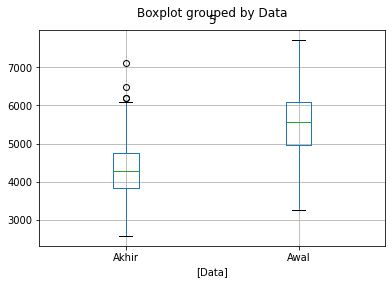

In [8]:
def Answer5a():
    print("Jawaban pertanyaan No.5 bagian a")
    print("\"Data kolom AreaBulatan dibagi 2 sama rata: bagian awal (populasi 1) dan bagian akhir kolom (populasi 2).")
    print(" Benarkah rata-rata kedua bagian tersebut sama?\"")

    # Variables
    populasi1 = df[5][:250]
    populasi2 = df[5][250:]
    n1 = n2 = 50                        # ukuran sampel
    sample1 = populasi1.sample(n1)
    sample2 = populasi2.sample(n2)
    sigma1 = populasi1.std()            # standar deviasi populasi
    sigma2 = populasi2.std()
    d0 = 0
    α = 0.05

    print("Let d0 = μ1 - μ2")
    print("1.\tH0 : d0 = {}".format(d0))
    print("2.\tH1 : d0 ≠ {}".format(d0))
    print("3.\tα = {}".format(α))

    print("4.\tDigunakan tes statistik dengan distribusi normal two-tailed test")
    # Titik kiri dan kanan dari daerah kritis
    min_za, za = stats.norm.interval(1 - α, loc=0, scale=1)
    print("  \tDaerah kritis pada z < -z_({}/2) = {} atau z > z_({}/2) = {}".format(α, round(min_za, 3), α, round(za, 3)))
    
    print("5.\tTes statistik:")
    xbar1 = sample1.mean()
    xbar2 = sample2.mean()
    z = ((xbar1 - xbar2) - d0) / (sigma1**2/n1 + sigma2**2/n2)**0.5
    print("  \tx̄1 = {}, x̄2 = {}".format(round(xbar1, 5), round(xbar2, 5)))
    print("  \tσ1 = {}, σ2 = {}".format(round(sigma1, 5), round(sigma2, 5)))
    print("  \tz = ((x̄1 - x̄2) - d0) / (σ1**2/n1 + σ2**2/n2)**0.5 = {}".format(round(z, 3)))

    print("6.\tKesimpulan:")
    if (z < min_za or z > za):
        # z pada daerah kritis
        print("\tMenolak H0 karena nilai uji z = {} terletak pada daerah kritis".format(round(z, 3)))
        print("\tJadi, hipotesis alternatif rata-rata kedua populasi berbeda, diterima")
    else:
        # z di luar daerah kritis
        print("\tTidak menolak H0 karena nilai uji z = {} tidak terletak pada daerah kritis".format(round(z, 3)))
        print("\tJadi, hipotesis null rata-rata kedua populasi sama, diterima")

    print()
    print("Boxplot populasi 1 dan populasi 2:")
    DF1=pd.DataFrame(populasi1)
    DF2=pd.DataFrame(populasi2)
    DF1["Data"]="Awal"
    DF2["Data"]="Akhir"
    DF=[DF1,DF2]
    allDF=pd.concat(DF)
    allDF.boxplot(by="Data")

Answer5a()

Jawaban pertanyaan No.5 bagian b
"Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
 rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?"
1.	H0 : μ1-μ2 = 0.2
2.	H1 : μ1-μ2 ≠ 0.2
3.	α = 0.05
4.	Daerah kritis z>(z(0.05/2))= 1.96 karena P(Z<1.96)=0.975 atau z < -1.96
5.	z =  0.48110455539867686
6.	Tidak menolak H0 karena nilai uji : -1.96 < z < 1.96
	Jadi, hipotesis rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2 bisa dikatakan benar



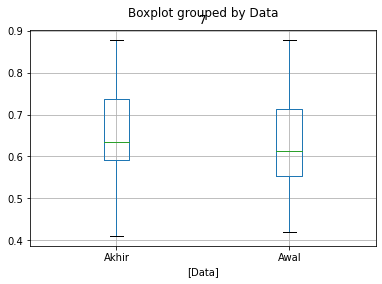

In [13]:


def Answer5b():
    print("Jawaban pertanyaan No.5 bagian b")
    print("\"Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah")
    print(" rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?\"")
    n=500
    data1=df[7][:n//2]
    data2=df[7][n//2:]
    n1=n2=50
    sample1=data1.sample(n1)
    sample2=data2.sample(n2)
    μ1=sample1.mean()
    μ2=sample2.mean()
    
    var1=sample1.var()
    var2=sample2.var()

    d0=-0.03
    print("1.\tH0 : μ1-μ2 = 0.2")
    print("2.\tH1 : μ1-μ2 ≠ 0.2")
    print("3.\tα = 0.05")
    print("4.\tDaerah kritis z>(z(0.05/2))= 1.96 karena P(Z<1.96)=0.975 atau z < -1.96")
    z=((μ1-μ2)-d0)/(var1/n1 + var2/n2)**0.5
    print("5.\tz = ",z)
    if (z>1.96 or z<-1.96):
        print("6.\tTolak H0 karena nilai uji = ",z," berada di titik kritis")
        print("\tJadi, hipotesis rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2 tidak bisa dikatakan benar")
    else:
        print("6.\tTidak menolak H0 karena nilai uji : -1.96 < z < 1.96")
        print("\tJadi, hipotesis rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2 bisa dikatakan benar")
    print()

    DF1=pd.DataFrame(data1)
    DF2=pd.DataFrame(data2)
    DF1["Data"]="Awal"
    DF2["Data"]="Akhir"
    DF=[DF1,DF2]
    allDF=pd.concat(DF)
    allDF.boxplot(by="Data")
Answer5b()

Jawaban pertanyaan No.5 bagian c
"Rata-rata 20 baris pertama kolom Bulatan (populasi 1) sama dengan 20 baris terakhirnya (populasi 2)"
 Dari masing-masing populasi diambil sampel acak berukuran 10
Let d0 = μ1 - μ2
1.	H0 : d0 = 0
2.	H1 : d0 ≠ 0
3.	α = 0.05
4.	Digunakan tes statistik dengan distribusi normal two-tailed test
  	Daerah kritis pada z < -z_(0.05/2) = -1.959963984540054 atau z > z_(0.05/2) = 1.959963984540054
5.	Tes statistik:
z = ((xbar1 - xbar2) - d0) / (sigma1**2/n1 + sigma2**2/n2)**0.5 = -2.3974553386215507
6.	Kesimpulan:
Menolak H0 karena nilai uji z = -2.3974553386215507 terletak pada daerah kritis
Jadi, hipotesis alternatif rata-rata kedua populasi berbeda, diterima


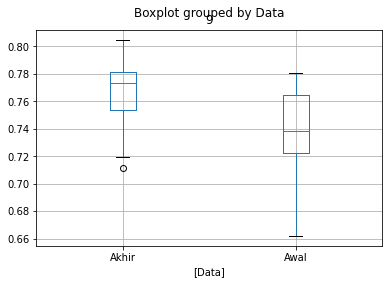

In [14]:
def Answer5c():
    print("Jawaban pertanyaan No.5 bagian c")
    print("\"Rata-rata 20 baris pertama kolom Bulatan (populasi 1) sama dengan 20 baris terakhirnya (populasi 2)\"")
    print(" Dari masing-masing populasi diambil sampel acak berukuran 10")

    # Variables
    populasi1 = df[9][:20]
    populasi2 = df[9][480:]
    n1 = n2 = 10
    sample1 = populasi1.sample(n1)
    sample2 = populasi2.sample(n2)
    sigma1 = populasi1.std()
    sigma2 = populasi2.std()
    d0 = 0
    α = 0.05

    print("Let d0 = μ1 - μ2")
    print("1.\tH0 : d0 = {}".format(d0))
    print("2.\tH1 : d0 ≠ {}".format(d0))
    print("3.\tα = {}".format(α))

    print("4.\tDigunakan tes statistik dengan distribusi normal two-tailed test")
    min_za, za = stats.norm.interval(1 - α, loc=0, scale=1)
    print("  \tDaerah kritis pada z < -z_({}/2) = {} atau z > z_({}/2) = {}".format(α, min_za, α, za))
    
    print("5.\tTes statistik:")
    xbar1 = sample1.mean()
    xbar2 = sample2.mean()
    z = ((xbar1 - xbar2) - d0) / (sigma1**2/n1 + sigma2**2/n2)**0.5
    print("z = ((xbar1 - xbar2) - d0) / (sigma1**2/n1 + sigma2**2/n2)**0.5 = {}".format(z))

    print("6.\tKesimpulan:")
    if (z < min_za or z > za):
        # z pada daerah kritis
        print("Menolak H0 karena nilai uji z = {} terletak pada daerah kritis".format(z))
        print("Jadi, hipotesis alternatif rata-rata kedua populasi berbeda, diterima")
    else:
        # z di luar daerah kritis
        print("Tidak menolak H0 karena nilai uji z = {} tidak terletak pada daerah kritis".format(z))
        print("Jadi, hipotesis null rata-rata kedua populasi sama, diterima")
    DF1=pd.DataFrame(populasi1)
    DF2=pd.DataFrame(populasi2)
    DF1["Data"]="Awal"
    DF2["Data"]="Akhir"
    DF=[DF1,DF2]
    allDF=pd.concat(DF)
    allDF.boxplot(by="Data")
Answer5c()

Jawaban pertanyaan No.5 bagian d
"Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
1.	H0 : p1=p2
2.	H1 : p1>p2
3.	α = 0.05
4.	Daerah kritis z>z(0.05)=1.645 karena P(Z<1.645)=0.95
5.	z =  5.465357250000211
6.	Tolak H0 karena nilai uji = z > 1.645
	Jadi, hipotesis Proporsi nilai bagian awal Ransum yang lebih dari 2 lebih besar daripada proporsi nilai yang sama di bagian akhir Ransum bisa dikatakan benar



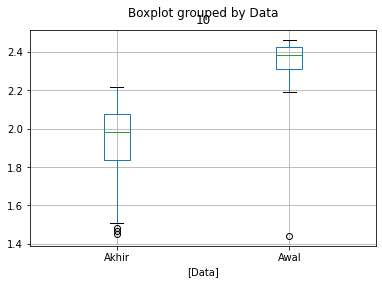

In [16]:

def Answer5d():
    print("Jawaban pertanyaan No.5 bagian d")
    print("\"Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?")

    n=500
    data1=df[10][:n//2]
    data2=df[10][n//2:]
    n1=n2=50
    sample1=data1.sample(n1)
    sample2=data2.sample(n2)
    p1=pd.DataFrame(sample1[sample1>2]).count().sum()/n1
    p2=pd.DataFrame(sample2[sample2>2]).count().sum()/n2
    p=(pd.DataFrame(sample1[sample1>2]).count().sum()+pd.DataFrame(sample2[sample2>2]).count().sum())/(n1+n2)
    q=1-p
    print("1.\tH0 : p1=p2")
    print("2.\tH1 : p1>p2")
    print("3.\tα = 0.05")
    print("4.\tDaerah kritis z>z(0.05)=1.645 karena P(Z<1.645)=0.95")
    z=(p1-p2)/((p*q*(1/n1+1/n2))**0.5)
    print("5.\tz = ",z)
    if (z>1.645):
        print("6.\tTolak H0 karena nilai uji = z > 1.645")
        print("\tJadi, hipotesis Proporsi nilai bagian awal Ransum yang lebih dari 2 lebih besar daripada proporsi nilai yang sama di bagian akhir Ransum bisa dikatakan benar")
    else:
        print("6.\tTidak menolak H0 karena nilai uji z < 1.645")
        print("\tJadi, hipotesis Proporsi nilai bagian awal Ransum yang lebih dari 2 lebih besar daripada proporsi nilai yang sama di bagian akhir Ransum tidak bisa dikatakan benar")

    print()
    DF1=pd.DataFrame(data1)
    DF2=pd.DataFrame(data2)
    DF1["Data"]="Awal"
    DF2["Data"]="Akhir"
    DF=[DF1,DF2]
    allDF=pd.concat(DF)
    allDF.boxplot(by="Data")
Answer5d()

Jawaban pertanyaan No.5 bagian e
"Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya"
 Digunakan 250 data pertama sebagai populasi 1 dan sisanya populasi 2
 Digunakan sampel acak berukuran 120 dan 100
1.	H0 : σ1^2 = σ2^2
2.	H1 : σ1^2 ≠ σ2^2
3.	α = 0.05
4.	Tes statistik
  	v1 = 119, v2 = 99, s1 = 6.46, s2 = 6.163
  	Digunakan tes statistik dengan f-value two-tailed
  	Daerah kritis pada f < f_(1 - α/2)(v1, v2) = 0.687 atau f > f_(α/2)(v1, v2) = 1.466
5.	Komputasi:
f = s1^2/s^2 = 1.099
Menerima H0 karena nilai uji f = 1.099 tidak terletak pada daerah kritis
Jadi, hipotesis null variansi kedua populasi sama, diterima


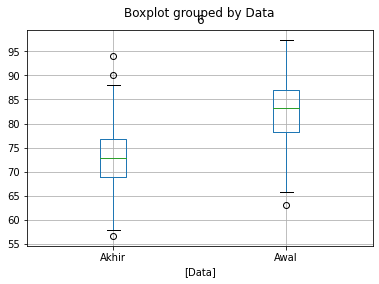

In [18]:
def Answer5e():
    print("Jawaban pertanyaan No.5 bagian e")
    print("\"Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya\"")
    print(" Digunakan 250 data pertama sebagai populasi 1 dan sisanya populasi 2")
    print(" Digunakan sampel acak berukuran 120 dan 100")
    

    # Variables
    populasi1 = df[6][:250]
    populasi2 = df[6][250:]
    n1 = 120
    n2 = 100
    sampel1 = populasi1.sample(n1)
    sampel2 = populasi2.sample(n2)
    std_sampel1 = sampel1.std()
    std_sampel2 = sampel2.std()
    v1 = n1 - 1
    v2 = n2 - 1
    α = 0.05
    f_left = FValue(1-α/2, v1, v2)   # f_(1 - α/2)(v1, v2)
    f_right = FValue(α/2, v1, v2)  # f_(α/2)(v1, v2)

    print("1.\tH0 : σ1^2 = σ2^2")
    print("2.\tH1 : σ1^2 ≠ σ2^2")
    print("3.\tα = {}".format(α))
    print("4.\tTes statistik")
    print("  \tv1 = {}, v2 = {}, s1 = {}, s2 = {}".format(v1, v2, round(std_sampel1, 3), round(std_sampel2, 3)))
    print("  \tDigunakan tes statistik dengan f-value two-tailed")
    
    print("  \tDaerah kritis pada f < f_(1 - α/2)(v1, v2) = {} atau f > f_(α/2)(v1, v2) = {}".format(round(f_left, 3), round(f_right, 3)))

    print("5.\tKomputasi:")
    f = std_sampel1**2 / std_sampel2**2
    print("f = s1^2/s^2 = {}".format(round(f, 3)))

    if (f < f_left or f > f_right):
        # f pada daerah kritis
        print("Menolak H0 karena nilai uji f = {} terletak pada daerah kritis".format(round(f, 3)))
        print("Jadi, hipotesis alternatif variansi kedua populasi berbeda, diterima")
    else:
        # f bukan daerah kritis
        print("Menerima H0 karena nilai uji f = {} tidak terletak pada daerah kritis".format(round(f, 3)))
        print("Jadi, hipotesis null variansi kedua populasi sama, diterima")
    DF1=pd.DataFrame(populasi1)
    DF2=pd.DataFrame(populasi2)
    DF1["Data"]="Awal"
    DF2["Data"]="Akhir"
    DF=[DF1,DF2]
    allDF=pd.concat(DF)
    allDF.boxplot(by="Data")

Answer5e()

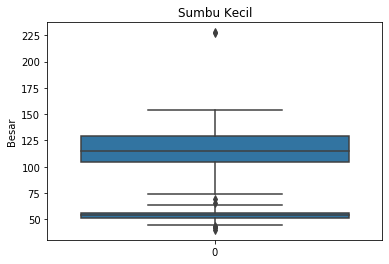

In [64]:
s = "x̄ 2"

data = df[3]
data.name
def test(_data):
    sns.boxplot(data=_data)
    plt.title(mapping[_data.name])
    plt.ylabel("Besar")
#test(data)
DrawBoxplot(2)
DrawBoxplot(3)
#data.boxplot()

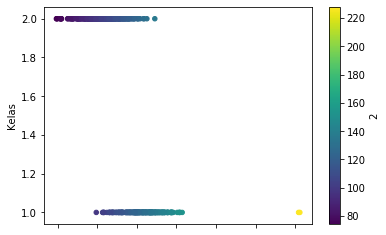

In [31]:
DrawScatter(2)